금주 실습에 등장한 load_digit dataset에 대하여

지난주에 배운 네가지 classifier의 default setting에서(LR, SVM, DT, RF) 

어떤 모델이 precision이 가장 높고, 어떤 모델이 가장 recall이 높은지

간단한 그래프를 그려서 구해보세요.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.datasets import load_digits
from sklearn.metrics import precision_score, recall_score

dataset 설정

In [4]:
dataset = load_digits()
x, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [39]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y_binary_imbalanced, random_state=0)

반복문으로 model 한번에 정의

-> precision_score & recall_score 한번에 results 배열에 저장

In [43]:
models = []
models.append(('LR', LogisticRegression(max_iter=800)))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

In [44]:
results = []
names = []

for name, model in models:
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    ret_precision = precision_score(y_test, y_predicted)
    ret_recall = recall_score(y_test, y_predicted)
    results.append([ret_precision, ret_recall])
    names.append(name)
    msg = "%s: %.2f %.2f" %(name, ret_precision, ret_recall)
    print(msg)

LR: 0.90 0.84
SVM: 1.00 0.95
DT: 0.86 0.84
RF: 1.00 0.91


In [48]:
ret = np.round(results, 2).T
ret

array([[0.9 , 1.  , 0.86, 1.  ],
       [0.84, 0.95, 0.84, 0.91]])

<IPython.core.display.Javascript object>


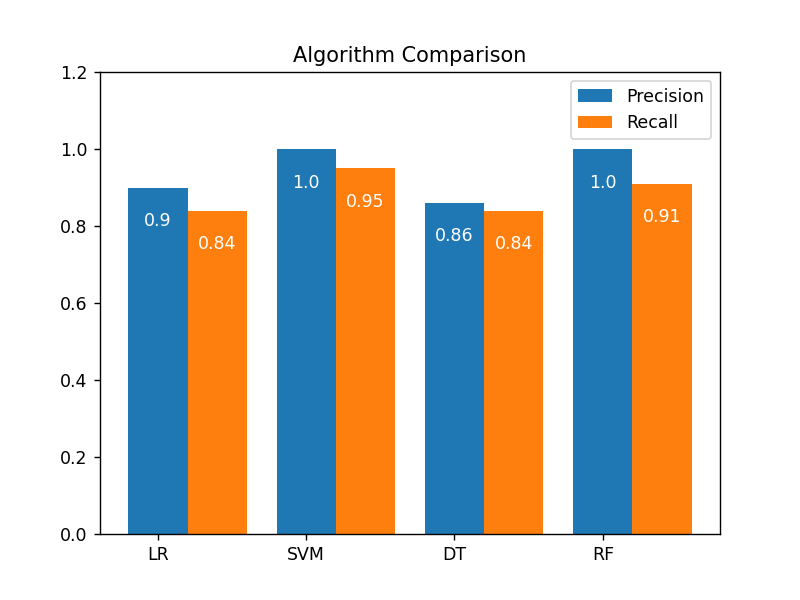

In [65]:
plt.figure()
pos = np.arange(len(names))
x1 = plt.bar(pos, ret[0], width=0.4)
x2 = plt.bar(pos+0.4, ret[1], width=0.4)
plt.title('Algorithm Comparison')
plt.xticks(pos, names)
plt.ylim([0.0, 1.2])
plt.legend((x1[0], x2[0]), ('Precision', 'Recall'))

# 바 크기 표시
for p in x1.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{float(height)}", (left+width/2, height-0.1), ha='center', color='#FFFFFF')
    
for p in x2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{float(height)}", (left+width/2, height-0.1), ha='center', color='#FFFFFF')

Precision이 가장 높은 model: SVM, Random Forest

Recall이 가장 높은 model: SVM